<a href="https://colab.research.google.com/github/TasnovaSUST/python-project/blob/main/Project(PP_02_08).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: "Weather Data Analysis Tool**

# **1. Data Initialization**

---Load and manipulate the data using Python core tools (no external libraries)



In [ ]:
import csv

# Open the file
file_path = "/content/Weather Data.csv"

# Read the file
with open(file_path, 'r', encoding='ISO-8859-1') as file:
    reader = csv.reader(file)
    data = [row for row in reader]

# Inspect the data
header = data[0]
rows = data[1:]
print("Header:", header)
print("First 3 rows:", rows[:3])

Header: ['Date', 'Temperature(°C)', 'Rainfall(mm)', 'Humidity(%)', 'Wind speed(km/h)', 'Condition']
First 3 rows: [['6/23/2024', '82', '35', '38', '33', 'Rainy'], ['12/22/2023', '42', '59', '20', '20', 'Sunny'], ['7/10/2024', '89', '18', '16', '46', 'Rainy']]


# **2. Importing and Validating**

---Allow users to:
○ Import new weather data into the application.
○ Validate the input to ensure correct formats for date and numerical fields.

---Handle missing or incomplete records:
○ Replace missing values with averages or predefined defaults.



In [ ]:
import pandas as pd
from datetime import datetime

# Function to import new weather data
def import_weather_data(file_path, encoding='latin1'):
    """
    Import and process weather data from a CSV file.

    Parameters:
    - file_path (str): The file path of the CSV file.
    - encoding (str): Encoding of the file (default is 'latin1').

    Returns:
    - pd.DataFrame: A cleaned weather data DataFrame.
    """
    try:
        # Load the weather data
        weather_data = pd.read_csv(file_path, encoding=encoding)

        # Validate data
        weather_data = validate_weather_data(weather_data)

        # Handle missing records
        weather_data = handle_missing_records(weather_data)

        print("Weather data imported and cleaned successfully!")
        return weather_data
    except Exception as e:
        print(f"Error importing data: {e}")
        return None

# Function to validate the input data
def validate_weather_data(data):
    """
    Validate the input data by ensuring proper formats for dates and numeric fields.

    Parameters:
    - data (pd.DataFrame): The raw weather data.

    Returns:
    - pd.DataFrame: Validated weather data.
    """
    # Convert 'Date' column to datetime format
    if 'Date' in data.columns:
        data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    # Ensure numerical fields are properly formatted
    numeric_columns = ['Temperature(°C)', 'Rainfall(mm)', 'Humidity(%)', 'Wind speed(km/h)']
    for col in numeric_columns:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    return data

# Function to handle missing or incomplete records
def handle_missing_records(data):
    """
    Handle missing values in the weather data by filling with averages or defaults.

    Parameters:
    - data (pd.DataFrame): The weather data with possible missing values.

    Returns:
    - pd.DataFrame: The cleaned weather data.
    """
    # Replace missing dates with today's date
    if 'Date' in data.columns:
        data['Date'] = data['Date'].fillna(datetime.today())

    # Replace missing numerical values with column averages
    numeric_columns = ['Temperature(°C)', 'Rainfall(mm)', 'Humidity(%)', 'Wind speed(km/h)']
    for col in numeric_columns:
        if col in data.columns:
            data[col] = data[col].fillna(data[col].mean())

    # Replace missing text values (e.g., 'Condition') with 'Unknown'
    if 'Condition' in data.columns:
        data['Condition'] = data['Condition'].fillna('Unknown')

    return data

# Example usage
file_path = '/content/Weather Data.csv'
cleaned_weather_data = import_weather_data(file_path)

# Display the cleaned data (optional)
if cleaned_weather_data is not None:
    print(cleaned_weather_data.head())

Weather data imported and cleaned successfully!
        Date  Temperature(°C)  Rainfall(mm)  Humidity(%)  Wind speed(km/h)  \
0 2024-06-23               82            35           38                33   
1 2023-12-22               42            59           20                20   
2 2024-07-10               89            18           16                46   
3 2024-09-15               91            64           81                14   
4 2024-04-29               22            22           99                93   

  Condition  
0     Rainy  
1     Sunny  
2     Rainy  
3     Rainy  
4     Rainy  


# **3. Analyzing Weather Trends**

---Calculate key statistics:
○ Average temperature, rainfall, and humidity over specific periods.
○ Days with the highest and lowest temperature or rainfall.
○ Count of sunny, rainy, or windy days in a given month.



In [ ]:
import pandas as pd
import chardet

# Function to import weather data from a CSV file with encoding handling
def import_weather_data(file_path):
    try:
        # Detect file encoding using chardet
        with open(file_path, 'rb') as file:
            raw_data = file.read(10000)  # Read a portion of the file to detect encoding
            result = chardet.detect(raw_data)
            file_encoding = result['encoding']

        # Now read the CSV with the detected encoding
        data = pd.read_csv(file_path, encoding=file_encoding)
        return data
    except Exception as e:
        print(f"Error importing weather data: {e}")
        return None

# Function to format date columns to remove the time portion
def format_date_columns(data):
    # Ensure 'Date' is in datetime format
    if 'Date' in data.columns and not pd.api.types.is_datetime64_any_dtype(data['Date']):
        data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    # Remove time portion (keep only the date)
    data['Date'] = data['Date'].dt.date
    return data

# Function to get weather statistics over specific periods
def get_weather_statistics(data, start_date=None, end_date=None, month=None):
    """
    Get various statistics from the weather data, including averages and counts for specific periods.

    Parameters:
    - data (pd.DataFrame): The cleaned weather data.
    - start_date (str or datetime): The start date for the period (optional).
    - end_date (str or datetime): The end date for the period (optional).
    - month (int): The month to analyze for counts (optional).

    Returns:
    - None: Prints the weather statistics.
    """
    # Ensure 'Date' is in datetime format
    if 'Date' in data.columns and not pd.api.types.is_datetime64_any_dtype(data['Date']):
        data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    # Filter data by date range (if provided)
    if start_date and end_date:
        data = data[(data['Date'] >= pd.to_datetime(start_date)) & (data['Date'] <= pd.to_datetime(end_date))]

    # If a month is provided, filter data for that month
    if month:
        data = data[data['Date'].dt.month == month]

    # Calculate averages
    average_temperature = data['Temperature(°C)'].mean()
    average_rainfall = data['Rainfall(mm)'].mean()
    average_humidity = data['Humidity(%)'].mean()

    # Days with the highest and lowest temperature
    highest_temperature_day = data.loc[data['Temperature(°C)'].idxmax(), 'Date']
    lowest_temperature_day = data.loc[data['Temperature(°C)'].idxmin(), 'Date']

    # Days with the highest and lowest rainfall
    highest_rainfall_day = data.loc[data['Rainfall(mm)'].idxmax(), 'Date']
    lowest_rainfall_day = data.loc[data['Rainfall(mm)'].idxmin(), 'Date']

    # Count of sunny, rainy, or windy days
    condition_counts = data['Condition'].value_counts()

    # Format dates to display only the date part (no time)
    highest_temperature_day = highest_temperature_day.strftime('%Y-%m-%d')
    lowest_temperature_day = lowest_temperature_day.strftime('%Y-%m-%d')
    highest_rainfall_day = highest_rainfall_day.strftime('%Y-%m-%d')
    lowest_rainfall_day = lowest_rainfall_day.strftime('%Y-%m-%d')

    # Display the results
    print(f"Average Temperature (°C): {average_temperature:.2f}")
    print(f"Average Rainfall (mm): {average_rainfall:.2f}")
    print(f"Average Humidity (%): {average_humidity:.2f}")
    print(f"Day with Highest Temperature: {highest_temperature_day}")
    print(f"Day with Lowest Temperature: {lowest_temperature_day}")
    print(f"Day with Highest Rainfall: {highest_rainfall_day}")
    print(f"Day with Lowest Rainfall: {lowest_rainfall_day}")
    print(f"Condition Counts (Sunny/Rainy/Windy): {condition_counts.to_dict()}")

# Example usage
file_path = '/content/Weather Data.csv'  # Replace with your file path
cleaned_weather_data = import_weather_data(file_path)

# Format the date columns to remove the time portion
if cleaned_weather_data is not None:
    cleaned_weather_data = format_date_columns(cleaned_weather_data)

    # Display the weather statistics for a specific date range (e.g., 2024-04-01 to 2024-06-30)
    print("\nWeather Statistics from 2024-04-01 to 2024-06-30:")
    get_weather_statistics(cleaned_weather_data, start_date='2024-04-01', end_date='2024-06-30')


Weather Statistics from 2024-04-01 to 2024-06-30:
Average Temperature (°C): 45.62
Average Rainfall (mm): 49.92
Average Humidity (%): 52.19
Day with Highest Temperature: 2024-06-02
Day with Lowest Temperature: 2024-04-19
Day with Highest Rainfall: 2024-05-14
Day with Lowest Rainfall: 2024-05-13
Condition Counts (Sunny/Rainy/Windy): {'Rainy': 13, 'Sunny': 13}


# **4. Weather Reports**


--- Generate summary reports for a user-specified date range:
○ Display the average, maximum, and minimum values for temperature, rainfall,
and wind speed.
○ List days with extreme conditions, such as storms or heatwaves.

In [ ]:
import pandas as pd

# Function to generate summary report
def generate_summary_report(data, start_date=None, end_date=None):
    """
    Generates a summary report for a user-specified date range.

    Parameters:
    - data (pd.DataFrame): The cleaned weather data.
    - start_date (str or datetime): The start date for the period.
    - end_date (str or datetime): The end date for the period.

    Returns:
    - None: Prints the summary report.
    """
    # Ensure 'Date' is in datetime format
    if 'Date' in data.columns and not pd.api.types.is_datetime64_any_dtype(data['Date']):
        data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    # Convert start_date and end_date to datetime (if they are provided as strings)
    if start_date:
        start_date = pd.to_datetime(start_date)
    if end_date:
        end_date = pd.to_datetime(end_date)

    # Filter data by date range (if provided)
    if start_date and end_date:
        data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

    # Calculate the average, max, and min for temperature, rainfall, and wind speed
    avg_temperature = data['Temperature(°C)'].mean()
    max_temperature = data['Temperature(°C)'].max()
    min_temperature = data['Temperature(°C)'].min()

    avg_rainfall = data['Rainfall(mm)'].mean()
    max_rainfall = data['Rainfall(mm)'].max()
    min_rainfall = data['Rainfall(mm)'].min()

    # Update the column name for wind speed to 'Wind speed(km/h)'
    avg_wind_speed = data['Wind speed(km/h)'].mean()
    max_wind_speed = data['Wind speed(km/h)'].max()
    min_wind_speed = data['Wind speed(km/h)'].min()

    # Identify extreme conditions
    heatwave_threshold = 40  # Temperature threshold for heatwaves
    storm_threshold = 50  # Rainfall threshold for storms
    high_wind_threshold = 30  # Wind speed threshold for high winds

    heatwave_days = data[data['Temperature(°C)'] > heatwave_threshold]
    storm_days = data[data['Rainfall(mm)'] > storm_threshold]
    high_wind_days = data[data['Wind speed(km/h)'] > high_wind_threshold]

    # Display summary report
    print(f"Summary Report from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}:")
    print("\nAverage Values:")
    print(f"Average Temperature (°C): {avg_temperature:.2f}")
    print(f"Average Rainfall (mm): {avg_rainfall:.2f}")
    print(f"Average Wind Speed (km/h): {avg_wind_speed:.2f}")

    print("\nMaximum and Minimum Values:")
    print(f"Max Temperature (°C): {max_temperature}")
    print(f"Min Temperature (°C): {min_temperature}")
    print(f"Max Rainfall (mm): {max_rainfall}")
    print(f"Min Rainfall (mm): {min_rainfall}")
    print(f"Max Wind Speed (km/h): {max_wind_speed}")
    print(f"Min Wind Speed (km/h): {min_wind_speed}")

    # Display extreme conditions
    if not heatwave_days.empty:
        print("\nHeatwave Days (Temperature > 40°C):")
        print(heatwave_days[['Date', 'Temperature(°C)']])
    else:
        print("\nNo Heatwave Days.")

    if not storm_days.empty:
        print("\nStorm Days (Rainfall > 50mm):")
        print(storm_days[['Date', 'Rainfall(mm)']])
    else:
        print("\nNo Storm Days.")

    if not high_wind_days.empty:
        print("\nHigh Wind Days (Wind Speed > 30 km/h):")
        print(high_wind_days[['Date', 'Wind speed(km/h)']])
    else:
        print("\nNo High Wind Days.")

# Example usage
file_path = '/content/Weather Data.csv'  # Replace with your file path

# Step 1: Import the weather data
cleaned_weather_data = import_weather_data(file_path)

# Step 2: Format the date columns to remove the time portion
if cleaned_weather_data is not None:
    cleaned_weather_data = format_date_columns(cleaned_weather_data)

    # Step 3: User-defined date range
    start_date = '2024-04-01'
    end_date = '2024-06-30'

    # Step 4: Generate the summary report
    generate_summary_report(cleaned_weather_data, start_date, end_date)

Summary Report from 2024-04-01 to 2024-06-30:

Average Values:
Average Temperature (°C): 45.62
Average Rainfall (mm): 49.92
Average Wind Speed (km/h): 53.46

Maximum and Minimum Values:
Max Temperature (°C): 99
Min Temperature (°C): 3
Max Rainfall (mm): 97
Min Rainfall (mm): 2
Max Wind Speed (km/h): 95
Min Wind Speed (km/h): 4

Heatwave Days (Temperature > 40°C):
         Date  Temperature(°C)
0  2024-06-23               82
6  2024-05-14               69
13 2024-04-17               84
28 2024-04-03               87
38 2024-05-01               77
47 2024-05-03               96
48 2024-05-25               72
52 2024-04-26               74
53 2024-06-02               99
60 2024-05-13               41
71 2024-06-16               57
86 2024-06-09               52
90 2024-05-14               83

Storm Days (Rainfall > 50mm):
         Date  Rainfall(mm)
6  2024-05-14            97
12 2024-06-11            63
14 2024-04-20            54
32 2024-05-13            73
38 2024-05-01            94
4

# **5. Data Visualization**

---Visualize trends using ASCII charts:
○ Line chart for temperature over time.
○ Bar chart for daily rainfall in a month.
○ Summary table showing weather stats by month.



In [ ]:
pip install asciichartpy


In [14]:
import pandas as pd
import chardet
from collections import defaultdict

# Function to import weather data from a CSV file with encoding handling
def import_weather_data(file_path):
    try:
        # Detect file encoding using chardet
        with open(file_path, 'rb') as file:
            raw_data = file.read(10000)  # Read a portion of the file to detect encoding
            result = chardet.detect(raw_data)
            file_encoding = result['encoding']

        # Now read the CSV with the detected encoding
        data = pd.read_csv(file_path, encoding=file_encoding)
        return data
    except Exception as e:
        print(f"Error importing weather data: {e}")
        return None

# Function to format date columns to remove the time portion
def format_date_columns(data):
    # Ensure 'Date' is in datetime format
    if 'Date' in data.columns and not pd.api.types.is_datetime64_any_dtype(data['Date']):
        data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    # Remove time portion (keep only the date)
    data['Date'] = data['Date'].dt.date
    return data

# Function to plot temperature trend as an ASCII line chart
def plot_temperature_trend(data):
    print("\nTemperature Trend (°C) Over Time:")

    # Ensure 'Date' is in datetime format before using .dt accessor
    if 'Date' in data.columns and not pd.api.types.is_datetime64_any_dtype(data['Date']):
        data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    data_sorted = data[['Date', 'Temperature(°C)']].dropna().sort_values(by='Date')
    max_temp = data_sorted['Temperature(°C)'].max()
    min_temp = data_sorted['Temperature(°C)'].min()
    temp_range = max_temp - min_temp

    # Scale temperature for ASCII visualization
    for _, row in data_sorted.iterrows():
        temp_scaled = int((row['Temperature(°C)'] - min_temp) / temp_range * 50)  # Scale to 50 chars width
        print(f"{row['Date']} | " + "█" * temp_scaled)

# Function to plot daily rainfall as an ASCII bar chart for a specific month
def plot_daily_rainfall(data, month):
    print(f"\nDaily Rainfall in Month {month}:")

    # Ensure 'Date' is in datetime format before using .dt accessor
    if 'Date' in data.columns and not pd.api.types.is_datetime64_any_dtype(data['Date']):
        data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    # Filter data for the given month
    data_sorted = data[data['Date'].dt.month == month][['Date', 'Rainfall(mm)']].dropna()

    for _, row in data_sorted.iterrows():
        rainfall_scaled = int(row['Rainfall(mm)'] / 5)  # Scale rainfall to 20 chars width (arbitrary scaling factor)
        print(f"{row['Date'].strftime('%Y-%m-%d')} | " + "■" * rainfall_scaled)

# Function to display weather statistics by month in an ASCII table
def display_monthly_summary(data):
    monthly_stats = defaultdict(lambda: {'temp': [], 'rain': [], 'humidity': []})

    # Collect data by month
    for _, row in data.iterrows():
        month = row['Date'].month
        monthly_stats[month]['temp'].append(row['Temperature(°C)'])
        monthly_stats[month]['rain'].append(row['Rainfall(mm)'])
        monthly_stats[month]['humidity'].append(row['Humidity(%)'])

    print("\nWeather Statistics Summary by Month:")
    print(f"{'Month':<8} {'Avg Temp(°C)':<15} {'Avg Rainfall(mm)':<20} {'Avg Humidity(%)'}")
    for month, stats in sorted(monthly_stats.items()):
        avg_temp = sum(stats['temp']) / len(stats['temp'])
        avg_rain = sum(stats['rain']) / len(stats['rain'])
        avg_humidity = sum(stats['humidity']) / len(stats['humidity'])
        print(f"{month:<8} {avg_temp: <15.2f} {avg_rain: <20.2f} {avg_humidity: <.2f}")

# Example usage
file_path = '/content/Weather Data.csv'  # Replace with your file path
cleaned_weather_data = import_weather_data(file_path)

# Format the date columns to remove the time portion
if cleaned_weather_data is not None:
    cleaned_weather_data = format_date_columns(cleaned_weather_data)

    # Plot Temperature Trend
    plot_temperature_trend(cleaned_weather_data)

    # Plot Daily Rainfall for January (example)
    plot_daily_rainfall(cleaned_weather_data, month=1)

    # Display Monthly Summary
    display_monthly_summary(cleaned_weather_data)



Temperature Trend (°C) Over Time:
2023-12-10 00:00:00 | ███
2023-12-12 00:00:00 | ███████████████████████████████████████████████
2023-12-13 00:00:00 | ███
2023-12-13 00:00:00 | ████████████████████
2023-12-21 00:00:00 | ████████████████████████████████████████████████
2023-12-22 00:00:00 | ████████████████████
2023-12-31 00:00:00 | ████████████████████████████████████████████████
2024-01-06 00:00:00 | ██████████████████████████████████████████
2024-01-06 00:00:00 | ███████
2024-01-07 00:00:00 | ██████████████████
2024-01-07 00:00:00 | █████████████████████████████████████
2024-01-07 00:00:00 | █████████████████
2024-01-11 00:00:00 | ███
2024-01-23 00:00:00 | ████████████████
2024-01-24 00:00:00 | █████████████████
2024-01-26 00:00:00 | ██████████████
2024-01-29 00:00:00 | █
2024-02-01 00:00:00 | █████
2024-02-05 00:00:00 | ███████
2024-02-06 00:00:00 | █████
2024-02-17 00:00:00 | ███████████████████
2024-03-05 00:00:00 | ███████████████
2024-03-07 00:00:00 | █████████████████████████


Temperature Trend (°C) Over Time:


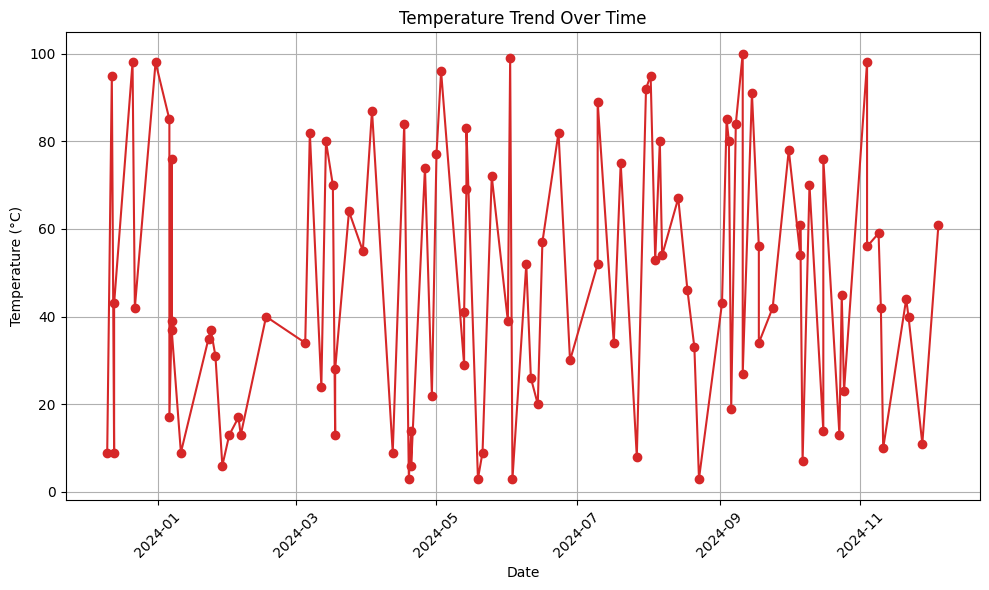


Daily Rainfall in Month 1:


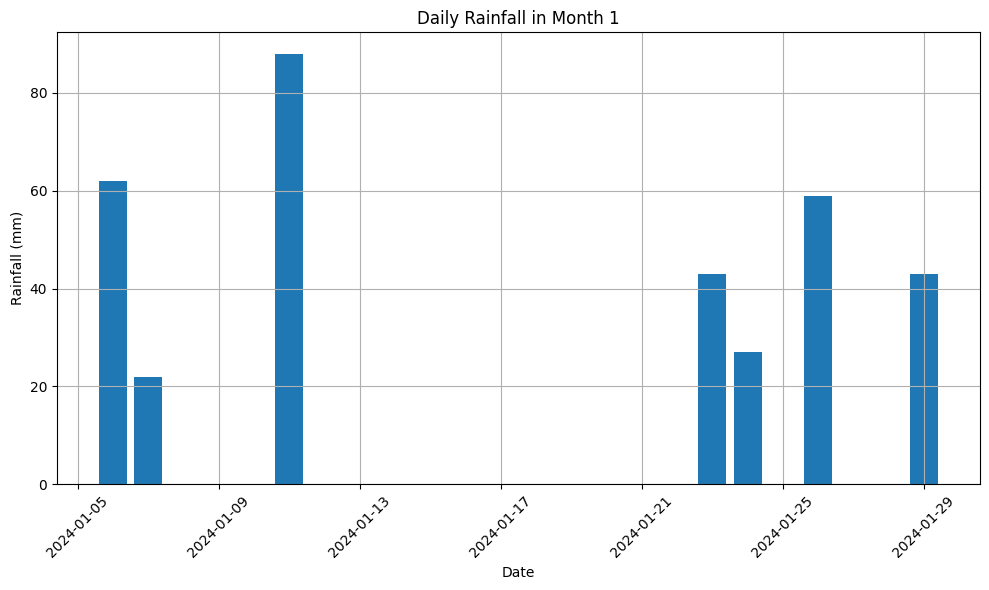


Weather Statistics Summary by Month:
Month    Avg Temp(°C)    Avg Rainfall(mm)     Avg Humidity(%)
1        37.20           42.40                44.50
2        20.75           49.50                38.50
3        50.00           46.11                51.33
4        37.38           32.12                61.25
5        53.22           68.33                63.33
6        45.33           47.33                33.00
7        58.33           47.17                44.67
8        53.88           64.38                39.38
9        60.09           63.09                59.18
10       44.10           61.80                55.50
11       45.00           49.75                47.50
12       56.88           67.00                38.50


In [ ]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to plot temperature trend as a line chart
def plot_temperature_trend(data):
    print("\nTemperature Trend (°C) Over Time:")

    # Ensure 'Date' is in datetime format before using .dt accessor
    if 'Date' in data.columns and not pd.api.types.is_datetime64_any_dtype(data['Date']):
        data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    data_sorted = data[['Date', 'Temperature(°C)']].dropna().sort_values(by='Date')

    plt.figure(figsize=(10, 6))
    plt.plot(data_sorted['Date'], data_sorted['Temperature(°C)'], marker='o', color='tab:red')
    plt.title('Temperature Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Function to plot daily rainfall as a bar chart for a specific month
def plot_daily_rainfall(data, month):
    print(f"\nDaily Rainfall in Month {month}:")

    # Ensure 'Date' is in datetime format before using .dt accessor
    if 'Date' in data.columns and not pd.api.types.is_datetime64_any_dtype(data['Date']):
        data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    # Filter data for the given month
    data_sorted = data[data['Date'].dt.month == month][['Date', 'Rainfall(mm)']].dropna()

    plt.figure(figsize=(10, 6))
    plt.bar(data_sorted['Date'], data_sorted['Rainfall(mm)'], color='tab:blue')
    plt.title(f'Daily Rainfall in Month {month}')
    plt.xlabel('Date')
    plt.ylabel('Rainfall (mm)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Function to display weather statistics by month in an ASCII table
def display_monthly_summary(data):
    monthly_stats = defaultdict(lambda: {'temp': [], 'rain': [], 'humidity': []})

    # Collect data by month
    for _, row in data.iterrows():
        month = row['Date'].month
        monthly_stats[month]['temp'].append(row['Temperature(°C)'])
        monthly_stats[month]['rain'].append(row['Rainfall(mm)'])
        monthly_stats[month]['humidity'].append(row['Humidity(%)'])

    print("\nWeather Statistics Summary by Month:")
    print(f"{'Month':<8} {'Avg Temp(°C)':<15} {'Avg Rainfall(mm)':<20} {'Avg Humidity(%)'}")
    for month, stats in sorted(monthly_stats.items()):
        avg_temp = sum(stats['temp']) / len(stats['temp'])
        avg_rain = sum(stats['rain']) / len(stats['rain'])
        avg_humidity = sum(stats['humidity']) / len(stats['humidity'])
        print(f"{month:<8} {avg_temp: <15.2f} {avg_rain: <20.2f} {avg_humidity: <.2f}")

# Example usage
file_path = '/content/Weather Data.csv'  # Replace with your file path
cleaned_weather_data = import_weather_data(file_path)

# Format the date columns to remove the time portion
if cleaned_weather_data is not None:
    cleaned_weather_data = format_date_columns(cleaned_weather_data)

    # Plot Temperature Trend
    plot_temperature_trend(cleaned_weather_data)

    # Plot Daily Rainfall for January (example)
    plot_daily_rainfall(cleaned_weather_data, month=1)

    # Display Monthly Summary
    display_monthly_summary(cleaned_weather_data)

**6. Advanced Features**

---● File Handling:
○ Allow exporting weather reports to a CSV file.
○ Save and reload user-defined analysis configurations.
● Error Handling:
○ Handle invalid data inputs and provide meaningful error messages.
● Interactive Search:
○ Allow users to search for weather data by date or condition.



In [ ]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from collections import defaultdict
import os
import json

# Function to export weather data or analysis to CSV
def export_to_csv(data, file_name):
    try:
        data.to_csv(file_name, index=False)
        print(f"Data successfully exported to {file_name}")
    except Exception as e:
        print(f"Error exporting data to CSV: {e}")

# Function to save user-defined analysis configurations to a JSON file
def save_user_config(config, file_name):
    try:
        with open(file_name, 'w') as f:
            json.dump(config, f)
        print(f"User configuration saved to {file_name}")
    except Exception as e:
        print(f"Error saving user configuration: {e}")

# Function to load user-defined analysis configurations from a JSON file
def load_user_config(file_name):
    try:
        if os.path.exists(file_name):
            with open(file_name, 'r') as f:
                config = json.load(f)
            print(f"User configuration loaded from {file_name}")
            return config
        else:
            print("No configuration file found.")
            return None
    except Exception as e:
        print(f"Error loading user configuration: {e}")
        return None

# Function to search weather data by date or condition
def search_weather_data(data, search_date=None, condition=None):
    try:
        if search_date:
            search_date = pd.to_datetime(search_date).date()
            filtered_data = data[data['Date'] == search_date]
        elif condition:
            filtered_data = data[data['Condition'].str.contains(condition, case=False, na=False)]
        else:
            filtered_data = data

        if filtered_data.empty:
            print("No matching data found.")
        else:
            print(filtered_data)
    except Exception as e:
        print(f"Error searching weather data: {e}")

# Example usage
file_path = '/content/Weather Data.csv'  # Replace with your file path
cleaned_weather_data = import_weather_data(file_path)

# Format the date columns to remove the time portion
if cleaned_weather_data is not None:
    cleaned_weather_data = format_date_columns(cleaned_weather_data)

    # Export to CSV example
    export_to_csv(cleaned_weather_data, "weather_report.csv")

    # Save user configuration example
    user_config = {"selected_month": 1, "temperature_range": [10, 25]}
    save_user_config(user_config, "user_config.json")

    # Load user configuration example
    loaded_config = load_user_config("user_config.json")
    print(loaded_config)

    # Search weather data by date or condition
    search_weather_data(cleaned_weather_data, search_date="2024-01-10")
    search_weather_data(cleaned_weather_data, condition="Sunny")


Data successfully exported to weather_report.csv
User configuration saved to user_config.json
User configuration loaded from user_config.json
{'selected_month': 1, 'temperature_range': [10, 25]}
No matching data found.
          Date  Temperature(°C)  Rainfall(mm)  Humidity(%)  Wind speed(km/h)  \
1   2023-12-22               42            59           20                20   
5   2024-03-30               55            37           99                15   
10  2024-10-01               78            72           75                39   
11  2024-08-06               80            81           85                 9   
12  2024-06-11               26            63           22                93   
13  2024-04-17               84             6           68                85   
14  2024-04-20               14            54           54                46   
17  2024-10-23               13             3           10                23   
18  2024-10-06               54            96           98   

**7. User Interface**

---Create an interactive, menu-driven program:
○ Import or add weather data.
○ View statistics for a specific date or date range.
○ Generate ASCII-based visualizations.
○ Export reports to files



In [ ]:
import pandas as pd
import chardet
import os

# Function to import weather data from a CSV file with encoding handling
def import_weather_data(file_path):
    try:
        # Detect file encoding using chardet
        with open(file_path, 'rb') as file:
            raw_data = file.read(10000)  # Read a portion of the file to detect encoding
            result = chardet.detect(raw_data)
            file_encoding = result['encoding']

        # Now read the CSV with the detected encoding
        data = pd.read_csv(file_path, encoding=file_encoding)
        return data
    except Exception as e:
        print(f"Error importing weather data: {e}")
        return None

# Function to format date columns to remove the time portion
def format_date_columns(data):
    if 'Date' in data.columns:
        data['Date'] = pd.to_datetime(data['Date'], errors='coerce').dt.date
    return data

# Function to view weather statistics for a specific date or range
def view_weather_statistics(data):
    try:
        print("\nEnter a specific date (YYYY-MM-DD) or a date range (YYYY-MM-DD to YYYY-MM-DD):")
        date_range = input("Date range (or press Enter for a specific date): ").strip()

        # If the input contains 'to', it's a range
        if 'to' in date_range:
            start_date, end_date = date_range.split(" to ")
            filtered_data = data[(data['Date'] >= pd.to_datetime(start_date)) & (data['Date'] <= pd.to_datetime(end_date))]
        elif date_range:  # if only a single date is entered
            specific_date = date_range.strip()
            filtered_data = data[data['Date'] == pd.to_datetime(specific_date).date()]
        else:
            print("Invalid input. Please enter a valid date or date range.")
            return

        if filtered_data.empty:
            print("No data found for the specified date or range.")
        else:
            avg_temp = filtered_data['Temperature(°C)'].mean()
            avg_rain = filtered_data['Rainfall(mm)'].mean()
            avg_humidity = filtered_data['Humidity(%)'].mean()

            print(f"Statistics for the selected date/range:")
            print(f"Average Temperature: {avg_temp:.2f} °C")
            print(f"Average Rainfall: {avg_rain:.2f} mm")
            print(f"Average Humidity: {avg_humidity:.2f} %")
    except Exception as e:
        print(f"Error viewing weather statistics: {e}")

# Function to generate ASCII visualizations for temperature and rainfall trends
def generate_ascii_visualizations(data):
    try:
        # Generate ASCII bar chart for temperature trend
        print("\nTemperature Trend (°C):")
        for _, row in data.iterrows():
            date = row['Date']
            temperature = row['Temperature(°C)']
            print(f"{date} | {'█' * int(temperature)}")

        # Generate ASCII bar chart for rainfall trend
        print("\nRainfall Trend (mm):")
        for _, row in data.iterrows():
            date = row['Date']
            rainfall = row['Rainfall(mm)']
            print(f"{date} | {'█' * int(rainfall)}")

    except Exception as e:
        print(f"Error generating visualizations: {e}")

# Function to export the weather data to a CSV file
def export_weather_data(data):
    try:
        export_path = input("Enter the file path to export the weather data: ")
        data.to_csv(export_path, index=False)
        print(f"Weather data exported to {export_path}")
    except Exception as e:
        print(f"Error exporting weather data: {e}")

# Function to load user-defined configurations (e.g., date ranges for analysis)
def load_configurations():
    try:
        config_file = 'config.txt'
        if os.path.exists(config_file):
            with open(config_file, 'r') as file:
                config_data = file.read()
                print(f"Loaded configurations: \n{config_data}")
        else:
            print("No configurations found.")
    except Exception as e:
        print(f"Error loading configurations: {e}")

# Function to save user-defined configurations (e.g., date ranges for analysis)
def save_configurations():
    try:
        config_data = input("Enter configurations to save (e.g., date ranges): ")
        with open('config.txt', 'w') as file:
            file.write(config_data)
        print("Configurations saved successfully.")
    except Exception as e:
        print(f"Error saving configurations: {e}")

# Main function to run the menu-driven interactive program
def main():
    weather_data = None
    while True:
        print("\nMenu:")
        print("1. Import or add weather data")
        print("2. View statistics for a specific date or date range")
        print("3. Generate ASCII-based visualizations")
        print("4. Export reports to files")
        print("5. Load user-defined configurations")
        print("6. Save user-defined configurations")
        print("7. Exit")

        choice = input("Enter your choice (1-7): ").strip()

        if choice == '1':
            file_path = input("Enter the path to the CSV file: ").strip()
            weather_data = import_weather_data(file_path)
            if weather_data is not None:
                weather_data = format_date_columns(weather_data)
                print("Weather data imported successfully.")

        elif choice == '2':
            if weather_data is not None:
                view_weather_statistics(weather_data)
            else:
                print("Please import weather data first.")

        elif choice == '3':
            if weather_data is not None:
                generate_ascii_visualizations(weather_data)
            else:
                print("Please import weather data first.")

        elif choice == '4':
            if weather_data is not None:
                export_weather_data(weather_data)
            else:
                print("Please import weather data first.")

        elif choice == '5':
            load_configurations()

        elif choice == '6':
            save_configurations()

        elif choice == '7':
            print("Exiting the program.")
            break
        else:
            print("Invalid choice. Please select a valid option.")

if __name__ == "__main__":
    main()



Menu:
1. Import or add weather data
2. View statistics for a specific date or date range
3. Generate ASCII-based visualizations
4. Export reports to files
5. Load user-defined configurations
6. Save user-defined configurations
7. Exit
Enter your choice (1-7): 2
Please import weather data first.

Menu:
1. Import or add weather data
2. View statistics for a specific date or date range
3. Generate ASCII-based visualizations
4. Export reports to files
5. Load user-defined configurations
6. Save user-defined configurations
7. Exit
Enter your choice (1-7): 1
Enter the path to the CSV file: /content/Filtered_Data.csv
Weather data imported successfully.

Menu:
1. Import or add weather data
2. View statistics for a specific date or date range
3. Generate ASCII-based visualizations
4. Export reports to files
5. Load user-defined configurations
6. Save user-defined configurations
7. Exit
Enter your choice (1-7): 2

Enter a specific date (YYYY-MM-DD) or a date range (YYYY-MM-DD to YYYY-MM-DD):
Da